<a href="https://colab.research.google.com/github/Eswa2020/data-prep-project/blob/master/Esther_Wairimu_Kamau_Independent_project_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specifying the problem statement


 The goal of this project is to demonstrate the concept of hypothesis testing by investigating a claim about blue cars using a dataset from an electric car sharing service company called Autolib. More specifically, we will be comparing the blue car usage rates in  France since Autolib was an electric car sharing service inaugurated in Paris.
We will be using the Autolib dataset to perform Univariate and Bivariate Analysis for Paris and Hauts-de-Seine, which are two main French cities. Below are the specific hypotheses of interest for this analysis:

> Null Hypothesis: For both Paris and Hauts-de-Seine the average number of blue cars picked up during weekends is the same.

>> Ho : μ1 = μ2

> Alternative Hypothesis: The average number of blue cars picked up during the weekend is different for Paris and Hauts-de-Seine.

>> Ha : μ1 ≠ μ2 

# Metrics for Success

our project will be a success when we are able to achieve the following:

>*   Specify the null and alternative hypothesis.
>*   Perform EDA(Exploratory Data Analysis) to uncover trends within the dataset.
>*   Perform hypothesis testing and interpret the results.
>*   Give summaries and conclusions.

# Data Understanding

>Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on July 31st 2018.It was operated by the Bolloré industrial group. The Autolib' scheme maintained a fleet of all-electric Bolloré Bluecars for public use on a paid subscription basis, employing a citywide network of parking and charging stations.As of 3 July 2016, 3,980 Bluecars had been registered for the service, and the scheme had more than 126,900 registered subscribers.Autolib' furthermore offered 1,084 electric car stations in Paris agglomeration with 5,935 charging points.

>Since beginning operations in Paris, Autolib' expanded its business to the cities of Lyon and Bordeaux.Bolloré also signed deals to begin operating offshoots of Autolib' in London and Indianapolis in 2015,Turin in 2016 and Singapore in 2017.

> Autolib was in France that was operational between 2011 and 2018. The company had three types of electric cars i.e blue cars, Utilib cars and Utilib 1.4 cars. Blue cars were most popularly used. 

>Bluecars were available in different postal codes in France and renters could pick up cars in one station then drop them off at a different station that was closer to their destination.

> The dataset contains information for different postal codes for 6 months i.e.between January 2018 and June 2018.

# Steps for undertaking Experimental Design

> Below are the steps that will be conducted in this analysis in order to meet our projects expectations :


>*   Load data and check on the characteristics of the dataset
>*   Perform Data cleaning (check for and deal with outliers, anomalies,duplicates,null and missing data)
>*   Perform univariate and bivariate analysis
>*   Specify the null and alternative hypotheses
>*   Explain the sampling method 
>*   Perform hypothesis testing
>*   Discuss the hypothesis test results
>*   Provide project summary and conclusion
>*   Challenge our solution by providing insights on how we can make improvements.

# Appropriateness of Dataset

>The dataset to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset]

>The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network for Bluecar,utilib and utilib 14 cars

# Importing Libraries

In [1]:
# Importing Pandas
# 
import pandas as pd
import pandas_profiling as pp


In [3]:
#Importing Numpy
import numpy as np

In [4]:
#Importing Seaborn
import seaborn as sns

In [5]:
#Importing Matplotlib
import matplotlib.pyplot as plt

In [6]:
#importing scipy
from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
import warnings
warnings.filterwarnings('ignore')

#Loading the Dataset

In [8]:
#loading our datasets
#variable_definitions
autolib_def=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_def.head(5)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# previewing the dataset

In [ ]:
# Checking the bottom 5 records of the dataset

autolib_def.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#getting to know the number of columns and rows in the data set
autolib_def.shape

(16085, 13)

In [ ]:
# Checking datatypes for each attribute and previewing the existence of null values
#there are no null values in this dataset
autolib_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data Cleaning

In [9]:
# Since we only  interested in learning more about blue cars only
# we can drop all other unnecessary columns

autolib_def=autolib_def.drop(autolib_def.columns[7:], axis=1)
autolib_def.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [10]:
# then we we rename the columns for uniformity among the column names

autolib_def.columns = ['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type', 'total_bluecars_taken', 
                'total_bluecars_returned']
autolib_def.head(1)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103


In [11]:
# Removing spaces and uppercases in the columns names
autolib_def.columns = autolib_def.columns.str.lower().str.replace(" ", "")
autolib_def.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


## checking for Outliers

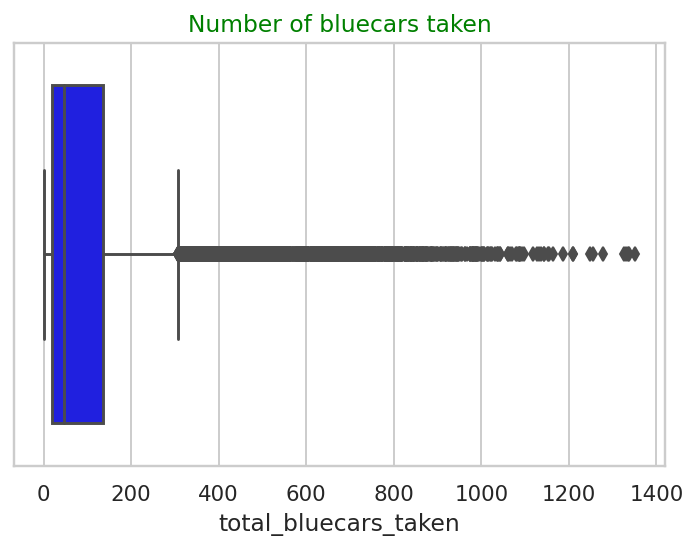

In [ ]:
# Checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 140)
sns.boxplot(autolib_def['total_bluecars_taken'] , color = 'blue')
plt.title("Number of bluecars taken", color = 'Green')
plt.show()

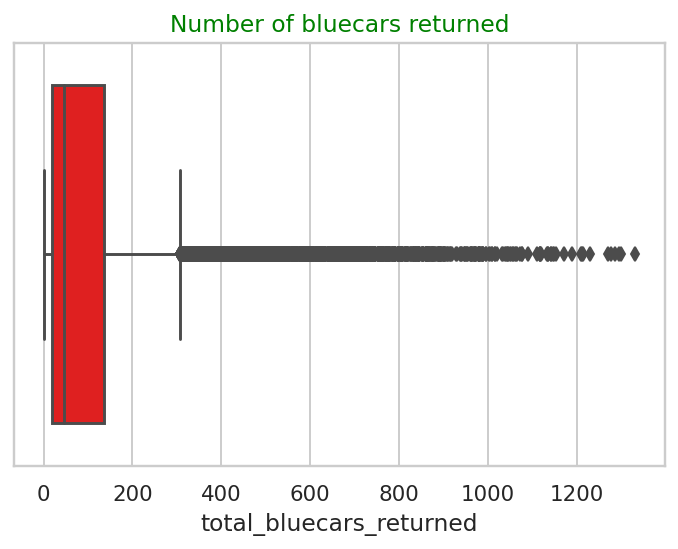

In [ ]:
# Checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 140)
sns.boxplot(autolib_def['total_bluecars_returned'] , color = 'red')
plt.title("Number of bluecars returned", color = 'Green')
plt.show()

>* There are very many 'outliers' in the dataset for the number of blue cars taken and returned. However, there is no sufficient evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers will definitely affect our observations, we will delete them.
>*we will investigate them further before dropping them

## checking for  Anomalies

Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

In [ ]:
# Checking for Anomalies
# 'blue cars taken' variable

q1_taken = autolib_def['total_bluecars_taken'].quantile(.25)
q3_taken = autolib_def['total_bluecars_taken'].quantile(.75)

iqr_taken = q3_taken - q1_taken
#checking for anomalies
# 'blue cars returanned' variable
q1_returned = autolib_def['total_bluecars_returned'].quantile(.25)
q3_returned = autolib_def['total_bluecars_returned'].quantile(.75)

iqr_returned = q3_returned - q1_returned

#checking for anomalies
# 'available data points' variable
q1_points = autolib_def['daily_data_points'].quantile(.25)
q3_points = autolib_def['daily_data_points'].quantile(.75)

iqr_points = q3_points - q1_points

print(iqr_taken, iqr_returned, iqr_points) 

115.0 115.0 1.0


> The IQR results show that the blue cars taken and blue cars returned have 115 records that are not within the middle 50%(Q2) of the records in those VARIABLES.

> The daily data points have only 1 record that does not lie within the upper and lower bounds.

## checking for missing Values

In [ ]:
#re-checking to confirm there are is zero null columns
autolib_def.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#checking for not null columns
autolib_def.notnull().sum()
#shows our  dataset has no null values

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [ ]:
# re-Checking for the data types of each column specifically
autolib_def.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [ ]:
#check if there are duplicates
autolib_def.duplicated().sum()
#there are no duplicates in our dataset

0

In [ ]:
#Getting to know more about the dataset by accessing its information

autolib_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## Removing Outliers and saving clean dataset

In [12]:
# Removing the Outliers
#we use the IQR to remove outliers like shown below
Q3 = autolib_def.quantile(0.75)
Q1 = autolib_def.quantile(0.25)

IQR = Q3-Q1

clean_data = autolib_def[~((autolib_def< (Q1 - 1.5 * IQR)) |(autolib_def > (Q3 + 1.5 * IQR))).any(axis=1)]
print(clean_data.shape)

(10024, 7)


In [13]:
# Save the cleaned dataset
clean_data.to_csv('./autolib_clean.csv')

#Univariate Analysis

>When performing the univariate analysis we will perform the actions below to try and undestand our dataset:

*   Calculate measures of central tendecy
*   Calculate the value spread in the data

*   Calculate measures of shape
*   Explore measures of concentration





In [14]:
#we will be using the data without outliers
autolib_clean = pd.read_csv("./autolib_clean.csv")

## Measures of central tendecy

In [15]:
# We can check the mean, mode and median of blue cars taken variable in our dataset

mean_taken = autolib_clean['total_bluecars_taken'].mean()
median_taken = autolib_clean['total_bluecars_taken'].median()
mode_taken = autolib_clean['total_bluecars_taken'].mode()

print(mean_taken, median_taken, mode_taken)

51.84357541899441 35.0 0    12
dtype: int64


In [ ]:
# We can check the mean, mode and median of blue cars returned in the dataset

mean_returned = autolib_clean['total_bluecars_returned'].mean()
median_returned = autolib_clean['total_bluecars_returned'].median()
mode_returned = autolib_clean['total_bluecars_returned'].mode()

print(mean_returned, median_returned, mode_returned)

51.816141260973666 35.0 0    13
dtype: int64


## Value spread in the data

In [ ]:
# Checking the various measures of dispersion for the number of blue cars taken variable
# standard deviation, variance, range, skewness and kurtosis

std1= autolib_clean['total_bluecars_taken'].std()
var1= autolib_clean['total_bluecars_taken'].var()

max1 = autolib_clean['total_bluecars_taken'].max()
min1 = autolib_clean['total_bluecars_taken'].min()
range1= max1 - min1

skew1 = autolib_clean['total_bluecars_taken'].skew()
kurt1 = autolib_clean['total_bluecars_taken'].kurt()

print('Standard Deviation is ' + str(std1))
print('Variance is ' + str(var1))
print('Range is ' + str(range1))
print('Skewness is ' + str(skew1))
print('Kurtosis is ' + str(kurt1))

Standard Deviation is 50.22468992265321
Variance is 2522.519477826663
Range is 302
Skewness is 1.875107464585823
Kurtosis is 4.173840111974478


In [ ]:
# Checking the various measures of dispersion for the blue cars returned variable
# standard deviation, variance, range, skewness and kurtosis
std2= autolib_clean['total_bluecars_returned'].std()
var2 = autolib_clean['total_bluecars_returned'].var()

max2 = autolib_clean['total_bluecars_returned'].max()
min2 = autolib_clean['total_bluecars_returned'].min()
range2 = max2 - min2

skew2= autolib_clean['total_bluecars_returned'].skew()
kurt2 = autolib_clean['total_bluecars_returned'].kurt()

print('Standard Deviation of the variable is ' + str(std1))
print('Variance of the variable is ' + str(var2))
print('Range of the variable is' + str(range2))
print('Skewness of the variable is ' + str(skew2))
print('Kurtosis of the variable is ' + str(kurt2))

Standard Deviation of the variable is 50.22468992265321
Variance of the variable is 2513.553841000062
Range of the variable is306
Skewness of the variable is 1.880169014990995
Kurtosis of the variable is 4.184956269278061


##  Measures of shape

In [16]:
 # plotting a  sns histogram of the bluecars_taken sum

sns.distplot(autolib_clean.bluecars_taken_sum, kde = True)


AttributeError: ignored

In [ ]:
autolib_def['BlueCars_taken_sum'].sum()

2025535

In [ ]:
autolib_def['BlueCars_returned_sum'].sum()

2025306

In [ ]:
autolib_def['Utilib_taken_sum'].sum()

59487